In [17]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
from subtle.utils.io import dicom_files
import nibabel as nib
from glob import glob

def get_nib_img(fpath_nii):
    return np.array(nib.load(fpath_nii).dataobj)

plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (10, 8)

<Figure size 720x576 with 0 Axes>

In [ ]:
h5_path = '/home/srivathsa/projects/studies/gad/smr_bet/pairs_mpr.h5'
hf = h5py.File(h5_path, 'r')

# all case ids
#case_id_lst = list(hf.keys())

# the list of selected 20 cases, which could be useful after skull stripping
case_id_lst = ['coffee-east-coffee-pasta', 'fish-kilo-sad-massachusetts', 'nuts-batman-aspen-california', 
               'nuts-twelve-august-coffee', 'early-asparagus-india-november', 'early-king-india-eighteen', 
               'early-lake-early-maine', 'early-missouri-india-xray', 'early-pizza-india-alabama', 
               'early-pluto-india-early', 'early-sad-india-aspen', 'early-stream-india-finch', 
               'early-texas-india-sweet', 'early-two-india-friend', 'early-violet-india-venus', 
               'early-wyoming-india-robert', 'nuts-white-aspen-one', 'early-mississippi-india-skylark', 
               'early-october-india-aspen', 'early-spring-india-echo']

# example data loader
for case_id in case_id_lst:
    if 'input_coreg_MPR1' in hf[case_id].keys():
        for ori in ['_ORI', '_MPR1', '_MPR2']:
            if 'input_coreg' + ori in hf[case_id].keys():
                img_input = np.array(hf[case_id + '/input_coreg' + ori])
                img_target = np.array(hf[case_id + '/target' + ori])

In [ ]:
print(img_input.shape)

In [ ]:
plt.imshow(np.hstack([img_input[..., 85], img_target[..., 85]]))
plt.colorbar()

print(img_input.shape)

In [ ]:
d = hf['coffee-east-coffee-pasta']
d.keys()

In [ ]:
d = hf['early-asparagus-india-november']
d.keys()

In [ ]:
np.array(d).shape

In [ ]:
df_data = pd.read_csv('/home/srivathsa/projects/studies/gad/smr_bet/pairs_mpr.csv')
dict_data = df_data.to_dict(orient='records')

In [ ]:
dict_case = [d for d in dict_data if d['PairUniqueID'] == 'coffee-east-coffee-pasta'][0]
dict_case

In [ ]:
dcm_input, _ = dicom_files('/home/srivathsa/projects/studies/gad/smr_bet/S_3D_Sag_T1_mprage_v2_SRE_4')
dcm_target, _ = dicom_files('/home/srivathsa/projects/studies/gad/smr_bet/3D_Sag_T1_mprage_3')
print(dcm_input.shape)

In [ ]:
plt.imshow(np.hstack([dcm_input[..., 85], dcm_target[..., 85]]))
plt.colorbar()

In [ ]:
mask = nib.load('/home/srivathsa/projects/studies/gad/smr_bet/nifti/coffee-east-coffee-pasta/target_ORI_mask.nii.gz').get_data()
print(mask.shape)
plt.imshow(mask[88])
plt.colorbar()

In [ ]:
data = nib.load('/home/srivathsa/projects/studies/gad/smr_bet/nifti/fish-kilo-sad-massachusetts/target_ORI.nii.gz').get_data()
print(data.shape)

In [ ]:
plt.imshow(data[:, :, 1, 126])

In [9]:
bpath = '/home/srivathsa/projects/studies/gad/smr_bet/nifti'
dest_path = '/home/srivathsa/projects/studies/gad/smr_bet/masks'
cases = [d.split('/')[-1] for d in glob('{}/*'.format(bpath))]

for case_id in cases:
    os.makedirs('{}/{}'.format(dest_path, case_id), exist_ok=True)
    for fpath_mask in glob('{}/{}/*_mask.nii.gz'.format(bpath, case_id)):
        os.rename(fpath_mask, fpath_mask.replace('nifti', 'masks'))

In [19]:
nib_vol = get_nib_img(
    '/home/srivathsa/projects/studies/gad/smr_bet/nifti/fish-kilo-sad-massachusetts/target_ORI_tmp.nii.gz'
)
print(nib_vol.shape)

(512, 512, 257)


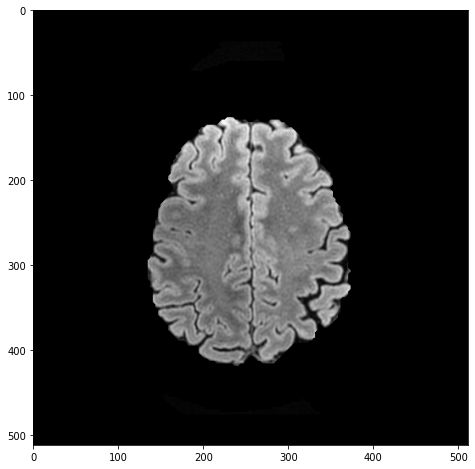

In [20]:
plt.imshow(nib_vol[..., 160])

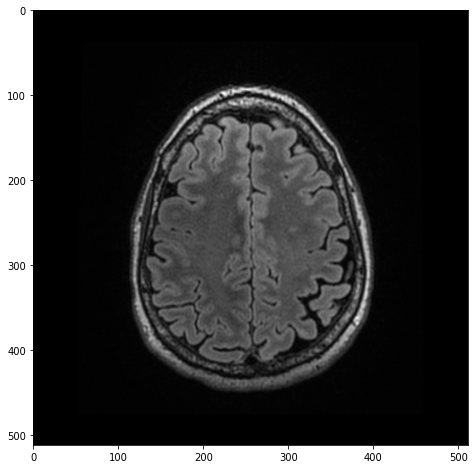

In [23]:
nib_vol2 = get_nib_img(
    '/home/srivathsa/projects/studies/gad/smr_bet/nifti/fish-kilo-sad-massachusetts/target_ORI.nii.gz'
)
plt.imshow(nib_vol2[..., 160])